In [1]:
# Importando as bibliotecas
import pandas as pd

# Lendo os principais arquivos CSV da Olist
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
categories = pd.read_csv('product_category_name_translation.csv')

# Exibindo as primeiras linhas da tabela de pedidos
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [2]:
# Verificando as dimensões da tabela
print("Linhas e colunas:", orders.shape)

# Verificando os nomes e tipos de dados
print("\nColunas e tipos de dados:")
print(orders.dtypes)

# Verificando se há valores nulos
print("\nValores nulos por coluna:")
print(orders.isnull().sum())


Linhas e colunas: (99441, 8)

Colunas e tipos de dados:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Valores nulos por coluna:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [3]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [4]:
# Garantindo que as datas estão em formato datetime
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Criando uma nova coluna: se o pedido foi entregue com atraso (True/False)
orders['atrasado'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']

# Verificando quantos pedidos foram entregues com atraso
orders['atrasado'].value_counts()


atrasado
False    91614
True      7827
Name: count, dtype: int64

In [5]:
total_entregues = orders['atrasado'].count()
total_atrasados = orders['atrasado'].sum()

percentual_atraso = (total_atrasados / total_entregues) * 100

print(f"Porcentagem de pedidos com atraso: {percentual_atraso:.2f}%")


Porcentagem de pedidos com atraso: 7.87%


In [6]:
# Garantindo que a data da compra também está no formato datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Criando nova coluna: tempo de entrega em dias
orders['tempo_entrega'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Excluindo pedidos com valores nulos (ex: cancelados)
tempo_entrega_valido = orders[orders['tempo_entrega'].notnull()]

# Estatísticas do tempo de entrega
print("Tempo médio de entrega:", tempo_entrega_valido['tempo_entrega'].mean())
print("Tempo mínimo:", tempo_entrega_valido['tempo_entrega'].min())
print("Tempo máximo:", tempo_entrega_valido['tempo_entrega'].max())


Tempo médio de entrega: 12.094085575687217
Tempo mínimo: 0.0
Tempo máximo: 209.0


In [7]:
# Criando uma nova coluna com ano e mês da compra
orders['ano_mes'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Contando o número de pedidos por mês
pedidos_mensais = orders.groupby('ano_mes').size().reset_index(name='total_pedidos')

# Exibindo as primeiras linhas
pedidos_mensais.head()


,ano_mes,total_pedidos
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780


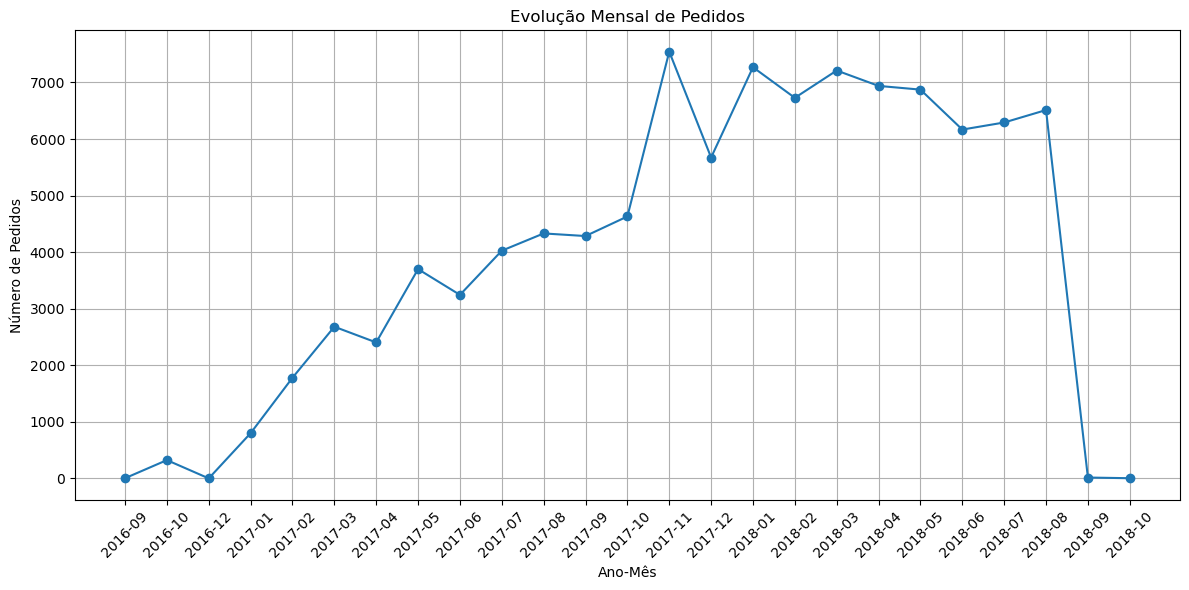

In [8]:
import matplotlib.pyplot as plt

# Convertendo 'ano_mes' para string para facilitar o plot
pedidos_mensais['ano_mes'] = pedidos_mensais['ano_mes'].astype(str)

plt.figure(figsize=(12,6))
plt.plot(pedidos_mensais['ano_mes'], pedidos_mensais['total_pedidos'], marker='o')
plt.xticks(rotation=45)
plt.title('Evolução Mensal de Pedidos')
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Verificando os métodos de pagamento
payments['payment_type'].value_counts()


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [10]:
# Convertendo a coluna de nota para numérico (se necessário)
reviews['review_score'] = pd.to_numeric(reviews['review_score'], errors='coerce')

# Fazendo o merge entre reviews e orders pelo order_id
orders_reviews = pd.merge(orders[['order_id', 'atrasado']], reviews[['order_id', 'review_score']], on='order_id')

# Verificando a média das notas com e sem atraso
media_avaliacoes = orders_reviews.groupby('atrasado')['review_score'].mean()
print(media_avaliacoes)


atrasado
False    4.214307
True     2.566550
Name: review_score, dtype: float64


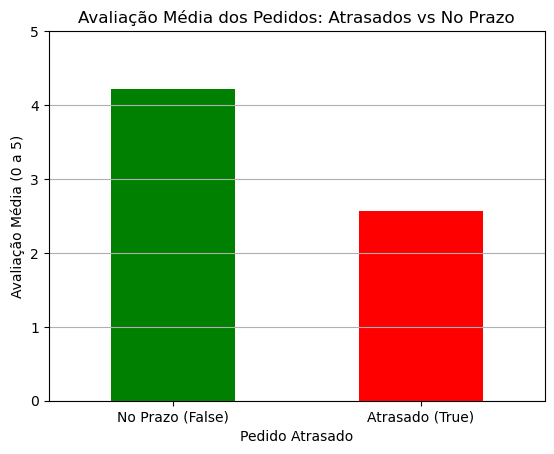

In [11]:
import matplotlib.pyplot as plt

# Dados para o gráfico
media_avaliacoes.plot(kind='bar', color=['green', 'red'])

plt.title('Avaliação Média dos Pedidos: Atrasados vs No Prazo')
plt.xlabel('Pedido Atrasado')
plt.ylabel('Avaliação Média (0 a 5)')
plt.xticks(ticks=[0,1], labels=['No Prazo (False)', 'Atrasado (True)'], rotation=0)
plt.ylim(0,5)
plt.grid(axis='y')

plt.show()
